In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

"""Pregnancies —    количество беременностей.
Glucose —           концентрация глюкозы в плазме через два часа при пероральном тесте на толерантность к глюкозе.
BloodPressure —     диастолическое артериальное давление (мм рт. ст.).
SkinThickness —     толщина кожной складки трицепса (мм).
Insulin —           двухчасовой сывороточный инсулин (ме Ед/мл).
BMI —               индекс массы тела ( вес в кг / (рост в м)**2 ).
DiabetesPedigreeFunction — функция родословной диабета (чем она выше, тем выше шанс наследственной заболеваемости).
Age —               возраст.
Outcome —           наличие диабета (0 — нет, 1 — да)."""

diabetes = pd.read_csv('data/diabetes_data.csv')
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Gender
0,6,98,58,33,190,34.0,0.430,43,0,Female
1,2,112,75,32,0,35.7,0.148,21,0,Female
2,2,108,64,0,0,30.8,0.158,21,0,Female
3,8,107,80,0,0,24.6,0.856,34,0,Female
4,7,136,90,0,0,29.9,0.210,50,0,Female
...,...,...,...,...,...,...,...,...,...,...
773,6,103,72,32,190,37.7,0.324,55,0,Female
774,1,71,48,18,76,20.4,0.323,22,0,Female
775,0,117,0,0,0,33.8,0.932,44,0,Female
776,4,154,72,29,126,31.3,0.338,37,0,Female


Начнём с поиска дубликатов в данных.

Найдите все повторяющиеся строки в данных и удалите их.

Для поиска используйте все признаки в данных.

Сколько записей осталось в данных?

In [17]:
dupl_columns=list(diabetes.columns)
mask=diabetes.duplicated(subset=dupl_columns)
no_dupl_data=diabetes.drop_duplicates(subset=diabetes.columns)
no_dupl_data.shape[0]

768

Далее найдите все неинформативные признаки в данных и избавьтесь от них.

В качестве порога информативности возьмите 0.95: удалите все признаки, для которых 95 % значений повторяются или 95 % записей уникальны.

В ответ запишите имена признаков, которые вы нашли (без кавычек).

Примечание: дальнейшая работа производится с очищенными от дубликатов и неинформативных признаков данных.

In [18]:
low_info_list=[]
for i in no_dupl_data.columns:
    #наибольшая частота(frequency) и количество уникальных признаков к общему(ratio)
    frequency=no_dupl_data[i].value_counts(normalize=True).max()
    ratio=round(no_dupl_data[i].nunique()/no_dupl_data[i].count(),4)
    #display(ratio)
    if frequency>0.95:
        low_info_list.append(i)
        print(f'{i}:{round(frequency*100,2)}% одинаковых значений')
    if ratio>0.95:
        low_info_list.append(i)
        print(f'{i}:{round(ratio*100,2)}% уникальных признаков')
low_info_list

cleaned_data=no_dupl_data.drop(low_info_list,axis=1)
cleaned_data

Gender:100.0% одинаковых значений


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,98,58,33,190,34.0,0.430,43,0
1,2,112,75,32,0,35.7,0.148,21,0
2,2,108,64,0,0,30.8,0.158,21,0
3,8,107,80,0,0,24.6,0.856,34,0
4,7,136,90,0,0,29.9,0.210,50,0
...,...,...,...,...,...,...,...,...,...
763,5,139,64,35,140,28.6,0.411,26,0
764,1,96,122,0,0,22.4,0.207,27,0
765,10,101,86,37,0,45.6,1.136,38,1
766,0,141,0,0,0,42.4,0.205,29,1


Попробуйте найти пропуски в данных с помощью метода isnull().

Спойлер: ничего не найдёте. А они есть! Просто они скрыты от наших глаз. 

В таблице пропуски в столбцах Glucose, BloodPressure, SkinThickness, Insulin и BMI обозначены нулём, поэтому традиционные методы поиска пропусков ничего вам не покажут. Давайте это исправим!

Замените все записи, равные 0, в столбцах Glucose, BloodPressure, SkinThickness, Insulin и BMI на символ пропуска. Его вы можете взять из библиотеки numpy: np.nan.

Какая доля пропусков содержится в столбце Insulin? Ответ округлите до сотых.

In [19]:
cleaned_data
"""Pregnancies —    количество беременностей.
Glucose —           концентрация глюкозы в плазме через два часа при пероральном тесте на толерантность к глюкозе.
BloodPressure —     диастолическое артериальное давление (мм рт. ст.).
SkinThickness —     толщина кожной складки трицепса (мм).
Insulin —           двухчасовой сывороточный инсулин (ме Ед/мл).
BMI —               индекс массы тела ( вес в кг / (рост в м)**2 ).
DiabetesPedigreeFunction — функция родословной диабета (чем она выше, тем выше шанс наследственной заболеваемости).
Age —               возраст.
Outcome —           наличие диабета (0 — нет, 1 — да)."""

cols_null_percent=cleaned_data.isnull().mean()
cols_null_percent

list_from_0_to_nan=['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for i in cleaned_data.columns:
    if i in list_from_0_to_nan:
        cleaned_data[i]=cleaned_data[i].apply(lambda x: np.nan if x==0 else x)
round(cleaned_data.isnull().mean(),2)

Pregnancies                 0.00
Glucose                     0.01
BloodPressure               0.05
SkinThickness               0.30
Insulin                     0.49
BMI                         0.01
DiabetesPedigreeFunction    0.00
Age                         0.00
Outcome                     0.00
dtype: float64

Удалите из данных признаки, где число пропусков составляет более 30 %.

Сколько признаков осталось в ваших данных (с учетом удаленных неинформативных признаков в задании 8.2)?

In [20]:
drop_data=cleaned_data.copy()
thresh=drop_data.shape[0]*0.7
drop_data=drop_data.dropna(thresh=thresh,axis=1)

drop_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,98.0,58.0,33.0,34.0,0.430,43,0
1,2,112.0,75.0,32.0,35.7,0.148,21,0
2,2,108.0,64.0,NaN,30.8,0.158,21,0
3,8,107.0,80.0,NaN,24.6,0.856,34,0
4,7,136.0,90.0,NaN,29.9,0.210,50,0
...,...,...,...,...,...,...,...,...
763,5,139.0,64.0,35.0,28.6,0.411,26,0
764,1,96.0,122.0,NaN,22.4,0.207,27,0
765,10,101.0,86.0,37.0,45.6,1.136,38,1
766,0,141.0,NaN,NaN,42.4,0.205,29,1


Удалите из данных только те строки, в которых содержится более двух пропусков одновременно.

Чему равно результирующее число записей в таблице?

In [21]:
columns_count=len(drop_data.columns)

thresh=columns_count-2

drop_data=drop_data.dropna(thresh=thresh,axis=0)

len(drop_data.index)

761

В оставшихся записях замените пропуски на медиану.

Чему равно среднее значение в столбце SkinThickness?

Ответ округлите до десятых.

In [22]:
cols_with_null=drop_data.isnull().mean()*100
cols_with_null=cols_with_null[cols_with_null>0].sort_values(ascending=False)
display(cols_with_null)
values={
    'SkinThickness':drop_data['SkinThickness'].median(),
    'BloodPressure':drop_data['BloodPressure'].median(),
    'Glucose':drop_data['Glucose'].median(),
    'BMI':drop_data['BMI'].median()
}
drop_data=drop_data.fillna(values)
drop_data.isnull().mean()

round(drop_data['SkinThickness'].mean(),1)
drop_data

SkinThickness    28.909330
BloodPressure     3.679369
Glucose           0.657030
BMI               0.525624
dtype: float64

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,98.0,58.0,33.0,34.0,0.430,43,0
1,2,112.0,75.0,32.0,35.7,0.148,21,0
2,2,108.0,64.0,29.0,30.8,0.158,21,0
3,8,107.0,80.0,29.0,24.6,0.856,34,0
4,7,136.0,90.0,29.0,29.9,0.210,50,0
...,...,...,...,...,...,...,...,...
763,5,139.0,64.0,35.0,28.6,0.411,26,0
764,1,96.0,122.0,29.0,22.4,0.207,27,0
765,10,101.0,86.0,37.0,45.6,1.136,38,1
766,0,141.0,72.0,29.0,42.4,0.205,29,1


Сколько выбросов найдёт классический метод межквартильного размаха в признаке SkinThickness?

Количество выбросов:87


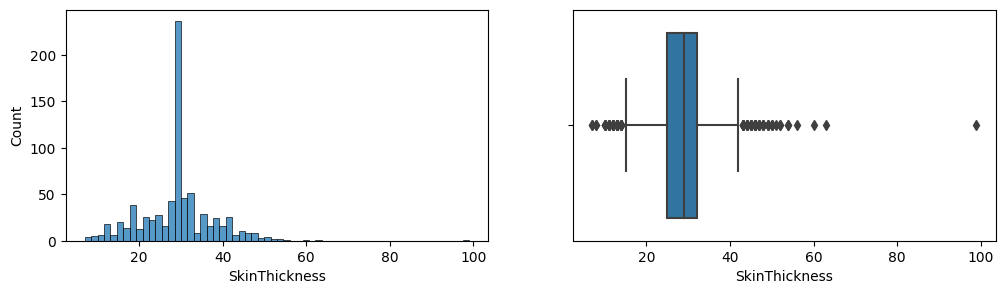

In [29]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(12,3));
histplot=sns.histplot(data=drop_data,x='SkinThickness', ax=axes[0]);
boxplot=sns.boxplot(data=drop_data,x='SkinThickness',ax=axes[1]);

x=drop_data['SkinThickness']
quartile_1,quartile_3=x.quantile(0.25),x.quantile(0.75)
iqr=quartile_3-quartile_1
lower_bound=quartile_1-(iqr*1.5)
upper_bound=quartile_3+(iqr*1.5)
outliers=drop_data[(x<lower_bound)|(x>upper_bound)]
cleaned=drop_data[(x>=lower_bound)&(x<=upper_bound)]
print(f'Количество выбросов:{outliers.shape[0]}')


Сколько выбросов найдёт классический метод z-отклонения в признаке SkinThickness?

In [31]:
x=drop_data['SkinThickness']
mu=x.mean()
sigma=x.std()
lower_bound=mu-3*sigma
upper_bound=mu+3*sigma
outliers=drop_data[(x<lower_bound)|(x>upper_bound)]
cleaned=drop_data[(x>=lower_bound)&(x<=upper_bound)]
outliers.shape[0]

4

На приведённой гистограмме показано распределение признака DiabetesPedigreeFunction.

Такой вид распределения очень похож на логнормальный, и он заставляет задуматься о логарифмировании признака. 

Найдите сначала число выбросов в признаке DiabetesPedigreeFunction с помощью классического метода межквартильного размаха.

In [32]:
x=drop_data['DiabetesPedigreeFunction']
quartile_1,quartile_3=x.quantile(0.25),x.quantile(0.75)
iqr=quartile_3-quartile_1
lower_bound=quartile_1-(iqr*1.5)
upper_bound=quartile_3+(iqr*1.5)
outliers=drop_data[(x<lower_bound)|(x>upper_bound)]
cleaned=drop_data[(x>=lower_bound)&(x<=upper_bound)]
print(f'Количество выбросов:{outliers.shape[0]}')


Количество выбросов:29
